In [3]:
import pandas as pd
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [4]:
df= pd.read_csv('Downloads/top10s.csv')

In [5]:
df

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


K-means is an unsupervised learning algorithm used for clustering problem whereas KNN is a supervised learning algorithm used for classification and regression problem. 

# Normalizing Data

In [331]:
scaler = MinMaxScaler()

In [332]:
X = df[['bpm','dnce']]

In [333]:
scaled = scaler.fit_transform(X)

In [334]:
scaled

array([[0.47087379, 0.69072165],
       [0.4223301 , 0.77319588],
       [0.58252427, 0.78350515],
       ...,
       [0.66019417, 0.54639175],
       [0.55339806, 0.6185567 ],
       [0.72815534, 0.72164948]])

https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe

In [335]:
scaled[0]

array([0.47087379, 0.69072165])

In [336]:
scaled_1 = np.array(scaled)

In [337]:
scaled_1 = pd.DataFrame(scaled,columns = ['bpm','dance'])

In [338]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

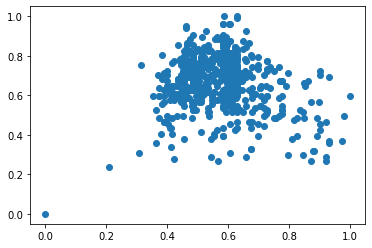

In [339]:
x= scaled_1['bpm']
y= scaled_1['dance']
plt.scatter(x,y)
plt.show()

# Writing KMeans code for only 2 centers

In [340]:
def kmeans_calculator(scaled,centers):
    cx1 = centers[0][0]
    cy1 = centers[0][1]
    cx2 = centers[1][0]
    cy2 = centers[1][1]

    
    c_array = [0] * len(centers)
    c_array = np.array(c_array)
    
    rank = [c_array] * len(scaled)
    rank = np.array(rank)
    
    total_distance_default = len(scaled)
    
    for k in range(1000):
        
        start = 0
        for row_data in scaled:
            x2 = row_data[0]
            y2 = row_data[1]
            
            c1_dist = math.sqrt((centers[0][0]-x2)**2 + (centers[0][1]-y2)**2)
            c2_dist = math.sqrt((centers[1][0]-x2)**2 + (centers[1][1]-y2)**2)
            
            if(c1_dist <= c2_dist):
                rank[start] = np.array([1,0])
              
            else:
                rank[start] = np.array([0,1])
        
            start = start + 1

        for center_row in range(len(centers)):
            rank_sum = 0
            for row in rank:
                rank_sum = rank_sum + row[center_row]

            rnk_data_sum = [0] * len(scaled[0])
            rnk_data_sum = np.array(rnk_data_sum)

            for row_number in range(len(scaled)):

                rnk_data_sum = rnk_data_sum + (int(rank[row_number][center_row]))*(scaled[row_number])

            centers[center_row] = rnk_data_sum/rank_sum



        total_distance = 0 
        for n in range(len(scaled)):
            for k in range(len(centers)):

                dist = (scaled[n][0]-centers[k][0])**2 + (scaled[n][1]-centers[k][1])**2  
                total_distance = total_distance + (int(rank[n][k]))*dist


        if(abs(total_distance - total_distance_default) < 0.005 ):
            return (centers,rank)



        
            
    return (centers,rank)

            
    
    
    

In [341]:
center1 = scaled[0]
center2 = scaled[-1]
centers = [center1,center2]

In [342]:
center_2, cluster_2 = kmeans_calculator(scaled,centers)

In [343]:
center_2

[array([0.5426027 , 0.73273635]), array([0.64580805, 0.51594716])]

In [290]:
cluster

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]])

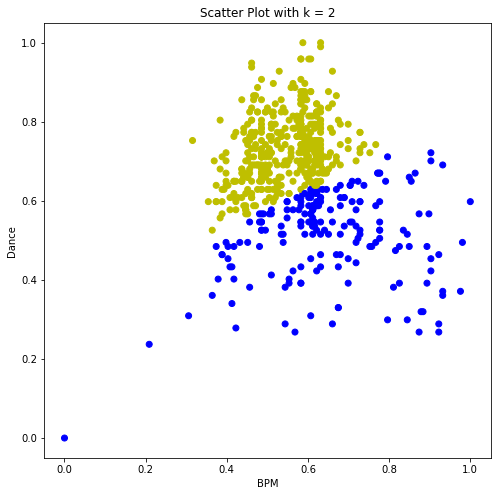

In [357]:
label_color = []
for i in range(len(cluster_2)):
    if(cluster_2[i][0] == 1):
        label_color.append('y')
    else:
        label_color.append('b')
plt.figure(figsize=(8, 8))     

plt.scatter(x, y, c=label_color)

plt.gca().update(dict(title='Scatter Plot with k = 2', xlabel='BPM', ylabel='Dance'))
plt.show()

# Writing KMeans for any k value

In [292]:
def k5means_calculator(scaled,centers):
    
    c_array = [0] * len(centers)
    c_array = np.array(c_array)
    
    rank = [c_array] * len(scaled)
    rank = np.array(rank)
    
    total_distance_default = len(scaled)
    
    for k in range(1000):
        
        for row_data in range(len(scaled)):
            
            x2 = scaled[row_data][0]
            y2 = scaled[row_data][1]
            
            c_dist = [float(0)] * len(centers)
            c_dist = np.array(c_dist)

            for k in range(len(centers)):
                
                c_dist[k] = math.sqrt((centers[k][0]-x2)**2 + (centers[k][1]-y2)**2 )

            result = np.where(c_dist == np.amin(c_dist) )
            
            rank[row_data] = np.array([0] * len(centers))
            rank[row_data][result[0]] = 1 


        for center_row in range(len(centers)):
            rank_sum = 0
            for row in rank:
                rank_sum = rank_sum + row[center_row]

            rnk_data_sum = [0] * len(scaled[0])
            rnk_data_sum = np.array(rnk_data_sum)

            for row_number in range(len(scaled)):

                rnk_data_sum = rnk_data_sum + (int(rank[row_number][center_row]))*(scaled[row_number])

            centers[center_row] = rnk_data_sum/rank_sum
            


        total_distance = 0 
        for n in range(len(scaled)):
            for k in range(len(centers)):

                dist = ( scaled[n][0] - centers[k][0] )**2 + (scaled[n][1] - centers[k][1])**2  
                total_distance = total_distance + (int(rank[n][k]))*dist


        if(abs(total_distance - total_distance_default) < 0.005 ):
            return (centers,rank)



        
            
    return (centers,rank)

            
    
    
    

In [293]:
centers = [scaled[1],scaled[100],scaled[50]]

In [294]:
center_3, cluster_3 = k5means_calculator(scaled,centers)

In [295]:
center_3

[array([0.46596297, 0.59590026]),
 array([0.71778962, 0.52065731]),
 array([0.57514498, 0.76669204])]

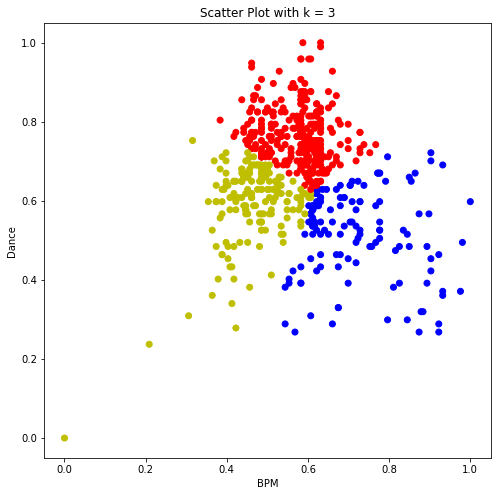

In [358]:
label_color = []
for i in range(len(cluster_3)):
    if(cluster_3[i][0] == 1):
        label_color.append('y')
    elif(cluster_3[i][1] == 1):
        label_color.append('b')
    else:
        label_color.append('r')    
plt.figure(figsize=(8, 8))        
plt.scatter(x, y, c=label_color)
plt.gca().update(dict(title='Scatter Plot with k = 3', xlabel='BPM', ylabel='Dance'))
plt.show()


In [298]:
centers = [scaled[1],scaled[100],scaled[-100],scaled[50]]
center_4, cluster_4 = k5means_calculator(scaled,centers)

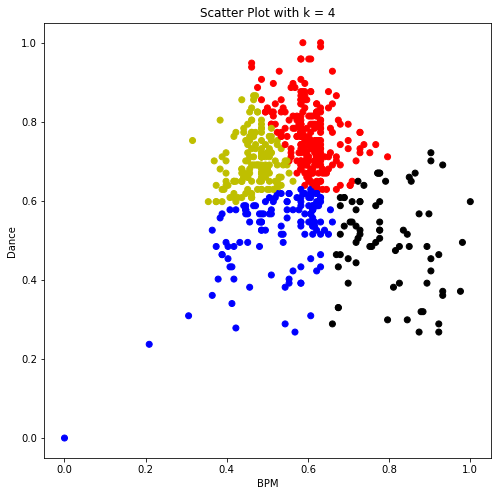

In [360]:
label_color = []
for i in range(len(cluster_4)):
    if(cluster_4[i][0] == 1):
        label_color.append('y')
    elif(cluster_4[i][1] == 1):
        label_color.append('b')
    elif(cluster_4[i][2] == 1):
        label_color.append('k')
    else:
        label_color.append('r')    
plt.figure(figsize=(8, 8))        
plt.scatter(x, y, c=label_color)

plt.gca().update(dict(title='Scatter Plot with k = 4', xlabel='BPM', ylabel='Dance'))
plt.show()

In [362]:
centers = [scaled[1],scaled[100],scaled[50],scaled[250], scaled[400]]
center_5, cluster_5 = k5means_calculator(scaled,centers)

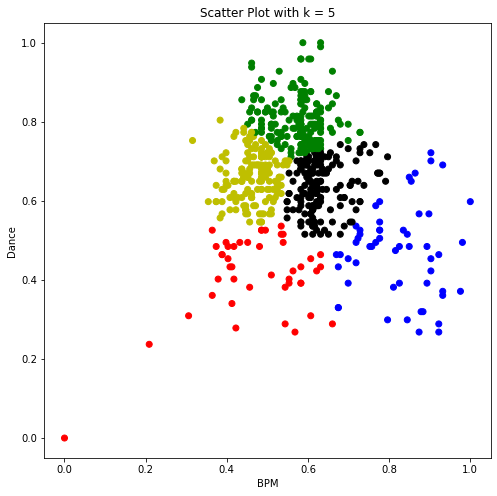

In [364]:
label_color = []
for i in range(len(cluster_5)):
    if(cluster_5[i][0] == 1):
        label_color.append('y')
    elif(cluster_5[i][1] == 1):
        label_color.append('b')
    elif(cluster_5[i][2] == 1):
        label_color.append('g')
    elif(cluster_5[i][3] == 1):
        label_color.append('k')
    else:
        label_color.append('r')    
plt.figure(figsize=(8, 8))        
plt.scatter(x, y, c=label_color)

plt.gca().update(dict(title='Scatter Plot with k = 5', xlabel='BPM', ylabel='Dance'))
plt.show()

# Writing KMeans for any k value, for all features

In [306]:
def euclidian_distance(data1,data2):
    dist  = 0
    for i in range(len(data1)):
        dist = dist + (data1[i]  - data2[i])**2
    return math.sqrt(dist)    

In [389]:
def k5means_calculator_allfeatures(scaled,centers):
    
    c_array = [0] * len(centers)
    c_array = np.array(c_array)
    
    rank = [c_array] * len(scaled)
    rank = np.array(rank)
    
    total_distance_default = len(scaled)
    
    for k in range(1000):
        
        for row_data in range(len(scaled)):
            
            x2 = scaled[row_data][0]
            y2 = scaled[row_data][1]
            
            c_dist = [float(0)] * len(centers)
            c_dist = np.array(c_dist)

            for k in range(len(centers)):
                
                c_dist[k] = euclidian_distance(centers[k],scaled[row_data])

            result = np.where(c_dist == np.amin(c_dist) )
            
            rank[row_data] = np.array([0] * len(centers))
            rank[row_data][result[0]] = 1 


        for center_row in range(len(centers)):
            rank_sum = 0
            for row in rank:
                rank_sum = rank_sum + row[center_row]

            rnk_data_sum = [0] * len(scaled[0])
            rnk_data_sum = np.array(rnk_data_sum)

            for row_number in range(len(scaled)):

                rnk_data_sum = rnk_data_sum + (int(rank[row_number][center_row]))*(scaled[row_number])

            centers[center_row] = rnk_data_sum/rank_sum
            


        total_distance = 0 
        for n in range(len(scaled)):
            for k in range(len(centers)):

                dist = euclidian_distance(centers[k],scaled[n])
                total_distance = total_distance + (int(rank[n][k]))*dist


        if(abs(total_distance - total_distance_default) < 0.005 ):
            return (centers,rank)



        
            
    return (centers,rank)

            
    
    
    

In [308]:
df.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

In [309]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [320]:
X = df[['bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']]
scaled_m = scaler.fit_transform(X)


In [321]:
scaled_m

array([[0.47087379, 0.90816327, 0.69072165, ..., 0.19191919, 0.08333333,
        0.83838384],
       [0.4223301 , 0.94897959, 0.77319588, ..., 0.24242424, 0.47916667,
        0.82828283],
       [0.58252427, 0.85714286, 0.78350515, ..., 0.1010101 , 0.29166667,
        0.80808081],
       ...,
       [0.66019417, 0.7755102 , 0.54639175, ..., 0.07070707, 0.70833333,
        0.70707071],
       [0.55339806, 0.80612245, 0.6185567 , ..., 0.01010101, 0.14583333,
        0.6969697 ],
       [0.72815534, 0.44897959, 0.72164948, ..., 0.06060606, 0.125     ,
        0.67676768]])

In [366]:
centers = [scaled_m[1],scaled_m[100],scaled_m[50],scaled_m[250], scaled_m[400]]
center_5, cluster_5 = k5means_calculator_allfeatures(scaled_m,centers)

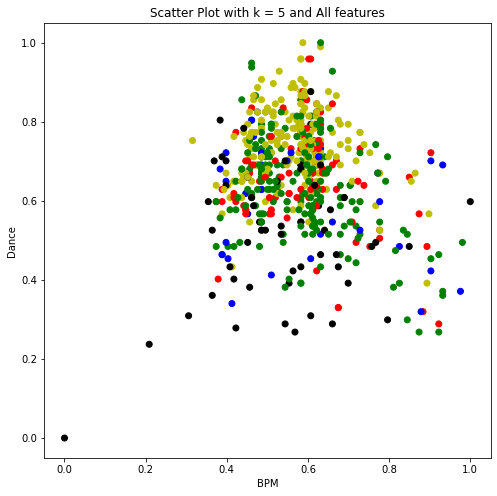

In [367]:
label_color = []
for i in range(len(cluster_5)):
    if(cluster_5[i][0] == 1):
        label_color.append('y')
    elif(cluster_5[i][1] == 1):
        label_color.append('b')
    elif(cluster_5[i][2] == 1):
        label_color.append('g')
    elif(cluster_5[i][3] == 1):
        label_color.append('k')
    else:
        label_color.append('r')    
plt.figure(figsize=(8, 8))

plt.scatter(x, y, c=label_color)
plt.gca().update(dict(title='Scatter Plot with k = 5 and All features', xlabel='BPM', ylabel='Dance'))
plt.show()

In [370]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(scaled_m)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(scaled_m)

In [372]:
X_reduced 

array([[-0.23481564, -0.24238856],
       [-0.20530738,  0.08762022],
       [-0.2783701 , -0.04228022],
       ...,
       [-0.1375038 , -0.00269713],
       [ 0.06380548,  0.39794938],
       [ 0.25963986,  0.1122444 ]])

In [375]:
scaled_m1 = pd.DataFrame(X_reduced, columns = ['feature1','feature2'])

In [377]:
x= scaled_m1['feature1']
y= scaled_m1['feature2']

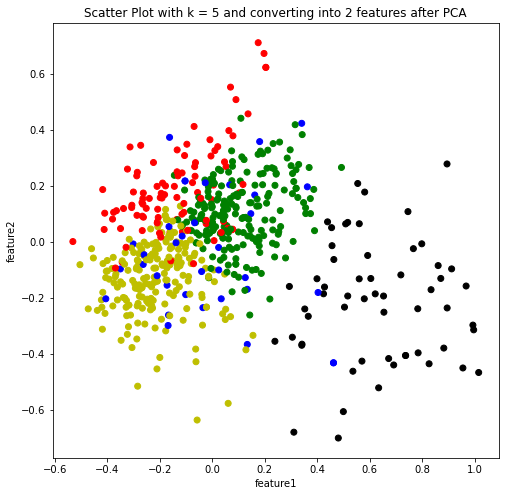

In [380]:
label_color = []
for i in range(len(cluster_5)):
    if(cluster_5[i][0] == 1):
        label_color.append('y')
    elif(cluster_5[i][1] == 1):
        label_color.append('b')
    elif(cluster_5[i][2] == 1):
        label_color.append('g')
    elif(cluster_5[i][3] == 1):
        label_color.append('k')
    else:
        label_color.append('r')    
plt.figure(figsize=(8, 8))

plt.scatter(x, y, c=label_color)
plt.gca().update(dict(title='Scatter Plot with k = 5 and converting into 2 features after PCA', xlabel='feature1', ylabel='feature2'))
plt.show()

In [393]:
centers = [X_reduced [1],X_reduced [100],X_reduced [50],X_reduced [250], X_reduced [400]]
center_5, cluster_5 = k5means_calculator_allfeatures(X_reduced ,centers)

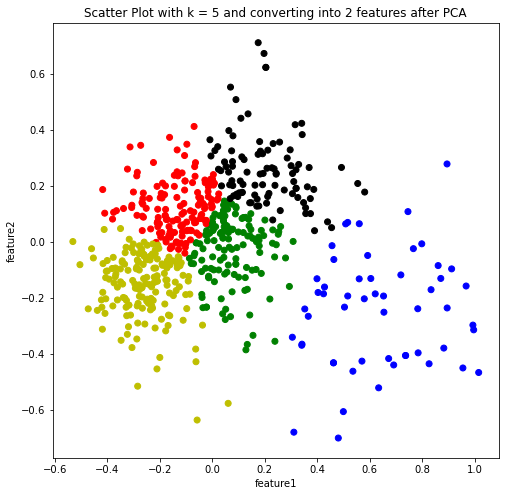

In [394]:
label_color = []
for i in range(len(cluster_5)):
    if(cluster_5[i][0] == 1):
        label_color.append('y')
    elif(cluster_5[i][1] == 1):
        label_color.append('b')
    elif(cluster_5[i][2] == 1):
        label_color.append('g')
    elif(cluster_5[i][3] == 1):
        label_color.append('k')
    else:
        label_color.append('r')    
plt.figure(figsize=(8, 8))

plt.scatter(x, y, c=label_color)
plt.gca().update(dict(title='Scatter Plot with k = 5 and converting into 2 features after PCA', xlabel='feature1', ylabel='feature2'))
plt.show()

In [382]:
scaled_2 = pd.DataFrame(scaled_m, columns = ['bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']) 

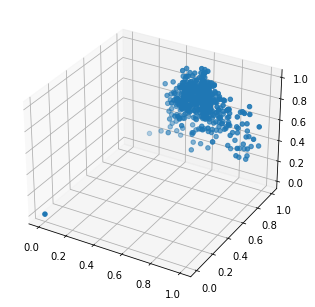

In [384]:
from mpl_toolkits.mplot3d import Axes3D
import random


fig = plt.figure()
ax = Axes3D(fig)

sequence_containing_x_vals = scaled_2['bpm']
sequence_containing_y_vals = scaled_2['dB']
sequence_containing_z_vals = scaled_2['dnce']


ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

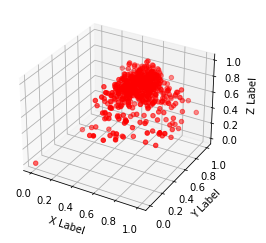

In [328]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]



ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [17]:
df['top genre'].unique()

array(['neo mellow', 'detroit hip hop', 'dance pop', 'pop',
       'canadian pop', 'hip pop', 'barbadian pop', 'atl hip hop',
       'australian pop', 'indie pop', 'art pop', 'colombian pop',
       'big room', 'british soul', 'chicago rap', 'acoustic pop',
       'permanent wave', 'boy band', 'baroque pop', 'celtic rock',
       'electro', 'complextro', 'canadian hip hop', 'candy pop',
       'alaska indie', 'folk-pop', 'metropopolis', 'house',
       'australian hip hop', 'electropop', 'australian dance',
       'hollywood', 'canadian contemporary r&b',
       'irish singer-songwriter', 'tropical house', 'belgian edm',
       'french indie pop', 'hip hop', 'danish pop', 'latin',
       'canadian latin', 'electronic trap', 'edm', 'electro house',
       'downtempo', 'brostep', 'contemporary country', 'moroccan pop',
       'escape room', 'alternative r&b'], dtype=object)

In [281]:
df['artist'].unique()

array(['Train', 'Eminem', 'Kesha', 'Lady Gaga', 'Bruno Mars',
       'Justin Bieber', 'Taio Cruz', 'OneRepublic', 'Alicia Keys',
       'Rihanna', 'Flo Rida', 'Mike Posner', 'Far East Movement', 'Usher',
       'Sean Kingston', 'The Black Eyed Peas', 'Adam Lambert', 'Maroon 5',
       'Neon Trees', 'Selena Gomez & The Scene', 'Enrique Iglesias',
       'Katy Perry', 'Britney Spears', '3OH!3', 'David Guetta',
       'Christina Aguilera', 'Florence + The Machine', 'Shakira',
       'Tinie Tempah', 'T.I.', 'Martin Solveig', 'Christina Perri',
       'Adele', 'Pitbull', 'Beyonc�', 'Hot Chelle Rae', 'Avril Lavigne',
       'Kanye West', 'LMFAO', 'Jessie J', 'Jennifer Lopez', 'Chris Brown',
       'Sleeping At Last', 'Nicki Minaj', 'P!nk', 'Coldplay',
       'One Direction', 'Taylor Swift', 'Carly Rae Jepsen',
       'Kelly Clarkson', 'Owl City', 'The Wanted', 'fun.',
       'Ellie Goulding', 'Gym Class Heroes', 'Avicii', 'The Script',
       'Miley Cyrus', 'Swedish House Mafia', 'Daft Punk'

In [282]:
df.groupby('top genre').sum()

,Unnamed: 0,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
top genre,,,,,,,,,,,,
acoustic pop,262,4024,310,122,85,-12,15,95,476,92,8,117
alaska indie,208,2013,132,34,51,-11,12,7,250,23,3,36
alternative r&b,589,2019,136,40,90,-9,6,35,198,5,13,84
art pop,2655,16119,921,481,419,-64,147,164,2087,278,52,502
atl hip hop,419,10054,514,411,299,-24,108,259,1422,50,98,250
australian dance,2266,12094,773,432,275,-27,61,323,1458,120,69,374
australian hip hop,231,2014,95,72,91,-4,5,38,200,9,7,70
australian pop,589,10058,769,372,320,-22,112,343,1109,33,46,327
barbadian pop,2881,30193,1880,1027,931,-75,266,778,3480,216,109,981
